In [4]:
# import your nypd dataset from local disk

import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

df = pd.read_csv("NYPD_Arrest_Data__Year_to_Date__20250407.csv") # replace nypd_data.csv with your file name
print(df.head())

Saving NYPD_Arrest_Data__Year_to_Date__20250407.csv to NYPD_Arrest_Data__Year_to_Date__20250407 (2).csv
User uploaded file "NYPD_Arrest_Data__Year_to_Date__20250407 (2).csv" with length 49665085 bytes
   ARREST_KEY ARREST_DATE  PD_CD            PD_DESC  KY_CD       OFNS_DESC  \
0   281369711  01/30/2024  177.0       SEXUAL ABUSE  116.0      SEX CRIMES   
1   284561406  03/30/2024  105.0  STRANGULATION 1ST  106.0  FELONY ASSAULT   
2   284896016  04/06/2024  105.0  STRANGULATION 1ST  106.0  FELONY ASSAULT   
3   285569016  04/18/2024  105.0  STRANGULATION 1ST  106.0  FELONY ASSAULT   
4   287308954  05/22/2024  464.0           JOSTLING  230.0        JOSTLING   

     LAW_CODE LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE  \
0  PL 1306501          F           M               25                  0   
1  PL 1211200          F           B               44                  0   
2  PL 1211200          F           M               19                  0   
3  PL 1211200          F  

In [35]:
# Clean the data

# Check for missing values
print(df.isnull().sum())

# Remove rows with missing values
df = df.dropna()

# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Convert data types if needed
# Example: Convert 'ARREST_DATE' to datetime
# df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

# Remove irrelevant columns
# Example: Remove the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
  df = df.drop('Unnamed: 0', axis=1)

# Check for and handle outliers (if necessary and relevant)

# Display the cleaned DataFrame
print(df.head())


ARREST_KEY                  0
ARREST_DATE                 0
PD_CD                       0
PD_DESC                     0
KY_CD                       0
OFNS_DESC                   0
LAW_CODE                    0
LAW_CAT_CD                  0
ARREST_BORO                 0
ARREST_PRECINCT             0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX                    0
PERP_RACE                   0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
dtype: int64
0
   ARREST_KEY ARREST_DATE  PD_CD            PD_DESC  KY_CD       OFNS_DESC  \
0   281369711  01/30/2024  177.0       SEXUAL ABUSE  116.0      SEX CRIMES   
1   284561406  03/30/2024  105.0  STRANGULATION 1ST  106.0  FELONY ASSAULT   
2   284896016  04/06/2024  105.0  STRANGULATION 1ST  106.0  FELONY ASSAULT   
3   285569016  04/18/2024  105.0  STRANGULATION 1ST  106.0  FELONY ASSAULT   
4   287308954  05/22/2024

In [36]:
# the goal of this project is to analyze nypd arrest data;
# pick any zip code/neighborhood/district in this dataset as an initial
# comparison point

# Choose a specific zip code for comparison (e.g., 10027)
area_cd = 0

# Filter the DataFrame for the chosen zip code
comparison_data = df[df['JURISDICTION_CODE'] == area_cd]

arrest_counts_by_offense = comparison_data['OFNS_DESC'].value_counts()
print(f"\nArrest Counts by Offense Description for Zip Code {area_cd}:\n", arrest_counts_by_offense)


Arrest Counts by Offense Description for Zip Code 0:
 OFNS_DESC
ASSAULT 3 & RELATED OFFENSES        34910
PETIT LARCENY                       26121
FELONY ASSAULT                      20702
DANGEROUS DRUGS                     16056
MISCELLANEOUS PENAL LAW             15000
VEHICLE AND TRAFFIC LAWS            12977
ROBBERY                             11572
GRAND LARCENY                       11190
CRIMINAL MISCHIEF & RELATED OF      10381
DANGEROUS WEAPONS                    8357
OFFENSES AGAINST PUBLIC ADMINI       6697
BURGLARY                             6302
SEX CRIMES                           5308
FORGERY                              4211
OFFENSES INVOLVING FRAUD             4088
OFF. AGNST PUB ORD SENSBLTY &        3756
POSSESSION OF STOLEN PROPERTY        3722
INTOXICATED & IMPAIRED DRIVING       2415
OTHER TRAFFIC INFRACTION             2172
OTHER STATE LAWS                     2161
GRAND LARCENY OF MOTOR VEHICLE       2035
OTHER OFFENSES RELATED TO THEFT      1740
CRIMINAL TR

In [22]:
# Analyze other relevant columns for the chosen zip code (e.g., age, gender)
age_distribution = comparison_data['AGE_GROUP'].value_counts()
print(f"\nAge Distribution for Zip Code {area_cd}:\n", age_distribution)


Age Distribution for Zip Code 0:
 AGE_GROUP
25-44    129409
45-64     43347
18-24     37005
<18        8769
65+        4106
Name: count, dtype: int64


In [23]:
gender_distribution = comparison_data['PERP_SEX'].value_counts()
print(f"\nGender Distribution for Zip Code {area_cd}:\n", gender_distribution)


Gender Distribution for Zip Code 0:
 PERP_SEX
M    180580
F     42056
Name: count, dtype: int64


In [24]:
# Example: Calculating the overall arrest counts by offense
overall_arrest_counts = df['OFNS_DESC'].value_counts()
print(f"\nOverall Arrest Counts by Offense Description:\n", overall_arrest_counts)


Overall Arrest Counts by Offense Description:
 OFNS_DESC
ASSAULT 3 & RELATED OFFENSES        38237
PETIT LARCENY                       27107
FELONY ASSAULT                      22606
DANGEROUS DRUGS                     18519
MISCELLANEOUS PENAL LAW             16541
VEHICLE AND TRAFFIC LAWS            13780
OTHER OFFENSES RELATED TO THEFT     12621
ROBBERY                             12020
CRIMINAL MISCHIEF & RELATED OF      11854
GRAND LARCENY                       11804
DANGEROUS WEAPONS                   10780
OFFENSES AGAINST PUBLIC ADMINI       8712
BURGLARY                             6450
SEX CRIMES                           5940
FORGERY                              4961
OFFENSES INVOLVING FRAUD             4611
OFF. AGNST PUB ORD SENSBLTY &        4274
POSSESSION OF STOLEN PROPERTY        4050
OTHER STATE LAWS                     3940
CRIMINAL TRESPASS                    2769
INTOXICATED & IMPAIRED DRIVING       2601
OTHER TRAFFIC INFRACTION             2352
GRAND LARCENY OF M

In [25]:
top_overall_offenses = overall_arrest_counts.head(5)
top_comparison_offenses = arrest_counts_by_offense.head(5)
print(f"\nTop 5 Overall Offenses:\n{top_overall_offenses}")
print(f"\nTop 5 Offenses for Zip Code {area_cd}:\n{top_comparison_offenses}")


Top 5 Overall Offenses:
OFNS_DESC
ASSAULT 3 & RELATED OFFENSES    38237
PETIT LARCENY                   27107
FELONY ASSAULT                  22606
DANGEROUS DRUGS                 18519
MISCELLANEOUS PENAL LAW         16541
Name: count, dtype: int64

Top 5 Offenses for Zip Code 0:
OFNS_DESC
ASSAULT 3 & RELATED OFFENSES    34910
PETIT LARCENY                   26121
FELONY ASSAULT                  20702
DANGEROUS DRUGS                 16056
MISCELLANEOUS PENAL LAW         15000
Name: count, dtype: int64


In [26]:
# Calculate proportions to compare
overall_proportions = overall_arrest_counts / len(df)
comparison_proportions = arrest_counts_by_offense / len(comparison_data)

print(f"\nOverall Proportions:\n{overall_proportions.head(5)}")
print(f"\nProportions for Zip Code {area_cd}:\n{comparison_proportions.head(5)}")


Overall Proportions:
OFNS_DESC
ASSAULT 3 & RELATED OFFENSES    0.147589
PETIT LARCENY                   0.104629
FELONY ASSAULT                  0.087256
DANGEROUS DRUGS                 0.071481
MISCELLANEOUS PENAL LAW         0.063846
Name: count, dtype: float64

Proportions for Zip Code 0:
OFNS_DESC
ASSAULT 3 & RELATED OFFENSES    0.156803
PETIT LARCENY                   0.117326
FELONY ASSAULT                  0.092986
DANGEROUS DRUGS                 0.072118
MISCELLANEOUS PENAL LAW         0.067375
Name: count, dtype: float64


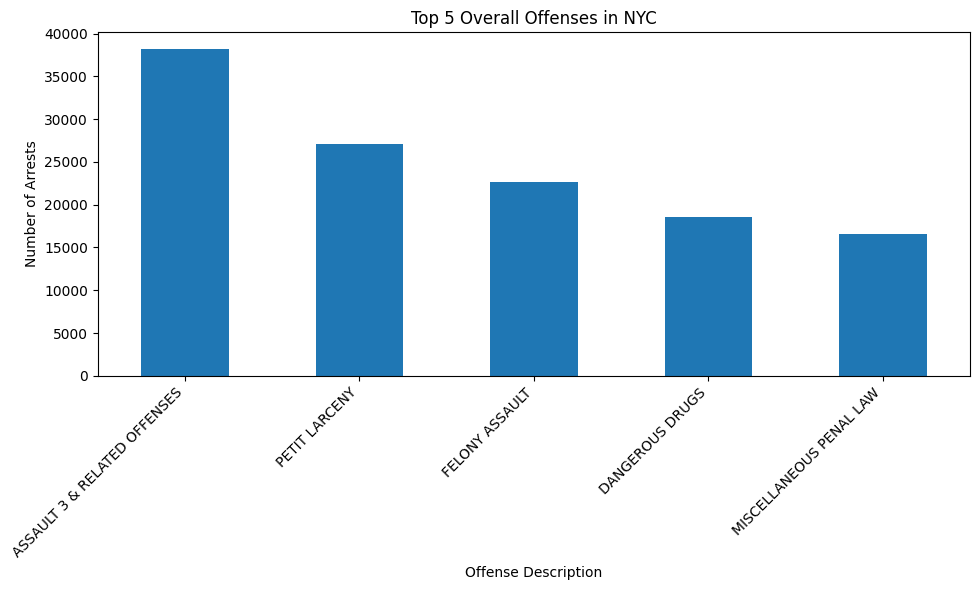

In [28]:
# create a visualization to the data

import matplotlib.pyplot as plt

# Plotting the top 5 overall offenses
plt.figure(figsize=(10, 6))
top_overall_offenses.plot(kind='bar')
plt.title('Top 5 Overall Offenses in NYC')
plt.xlabel('Offense Description')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


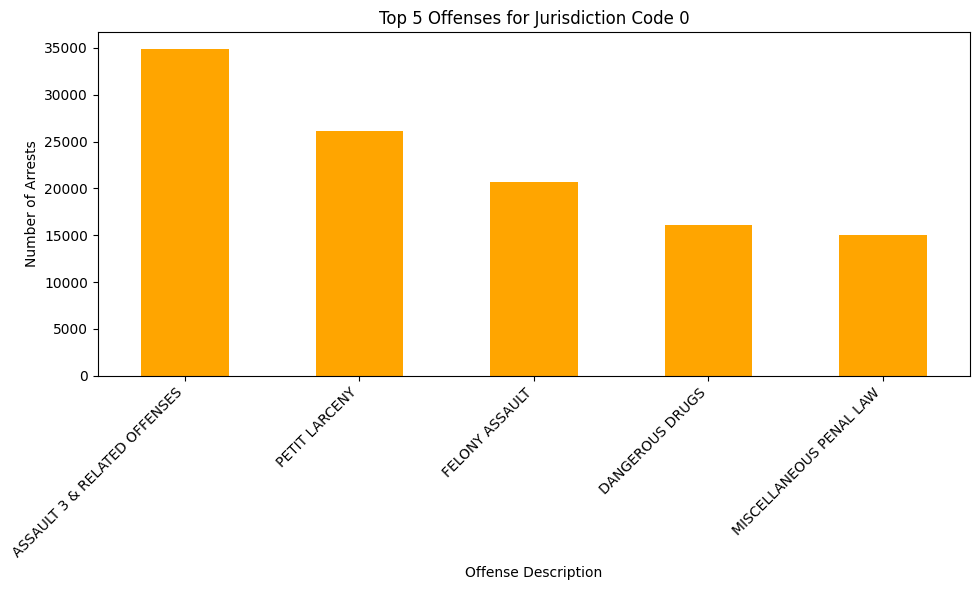

In [29]:
# Plotting the top 5 offenses for the chosen area code
plt.figure(figsize=(10, 6))
top_comparison_offenses.plot(kind='bar', color='orange')
plt.title(f'Top 5 Offenses for Jurisdiction Code {area_cd}')
plt.xlabel('Offense Description')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

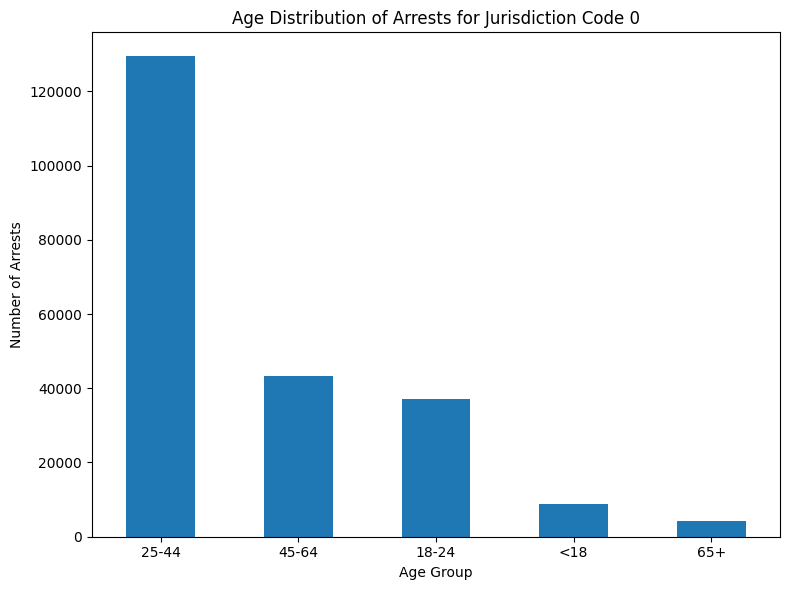

In [30]:
# Plotting age distribution for the chosen area code
plt.figure(figsize=(8, 6))
age_distribution.plot(kind='bar')
plt.title(f'Age Distribution of Arrests for Jurisdiction Code {area_cd}')
plt.xlabel('Age Group')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


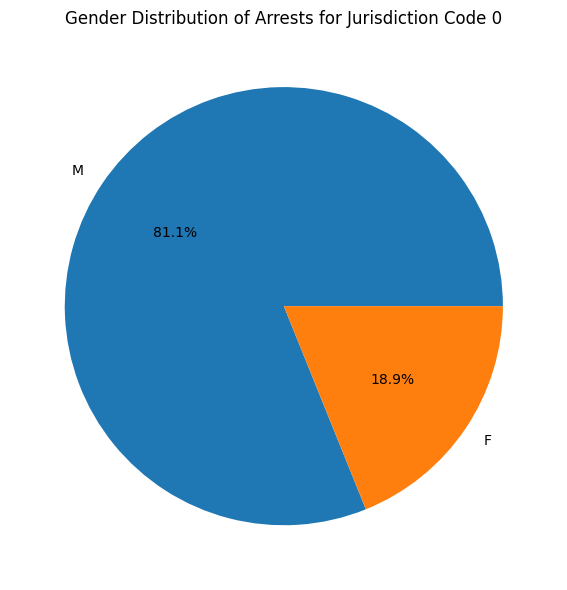

In [31]:
# Plotting gender distribution for the chosen area code
plt.figure(figsize=(6, 6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Gender Distribution of Arrests for Jurisdiction Code {area_cd}')
plt.ylabel('') # remove the default y-axis label
plt.tight_layout()
plt.show()


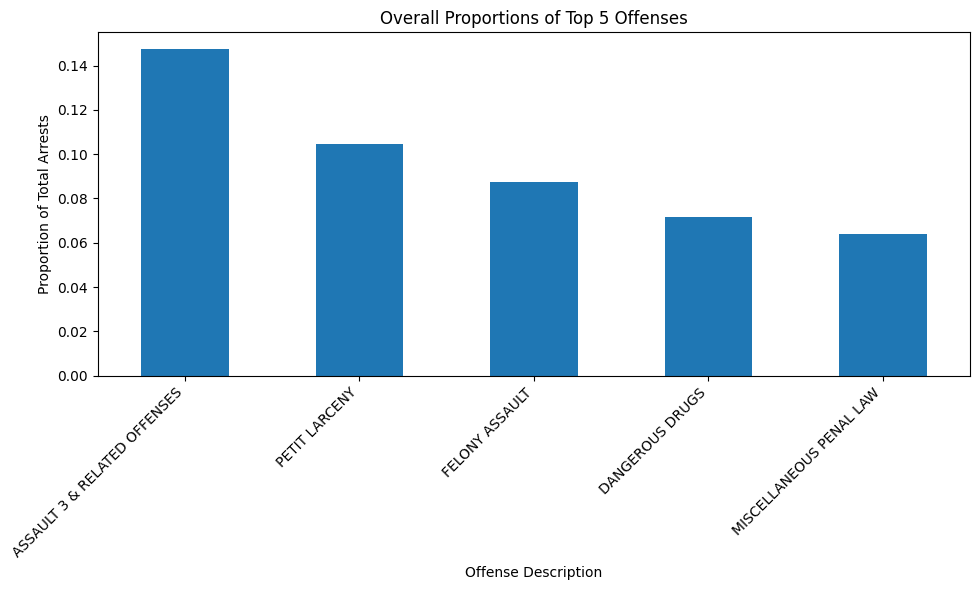

In [32]:
# Plotting overall proportions
plt.figure(figsize=(10,6))
overall_proportions.head(5).plot(kind='bar')
plt.title('Overall Proportions of Top 5 Offenses')
plt.xlabel('Offense Description')
plt.ylabel('Proportion of Total Arrests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


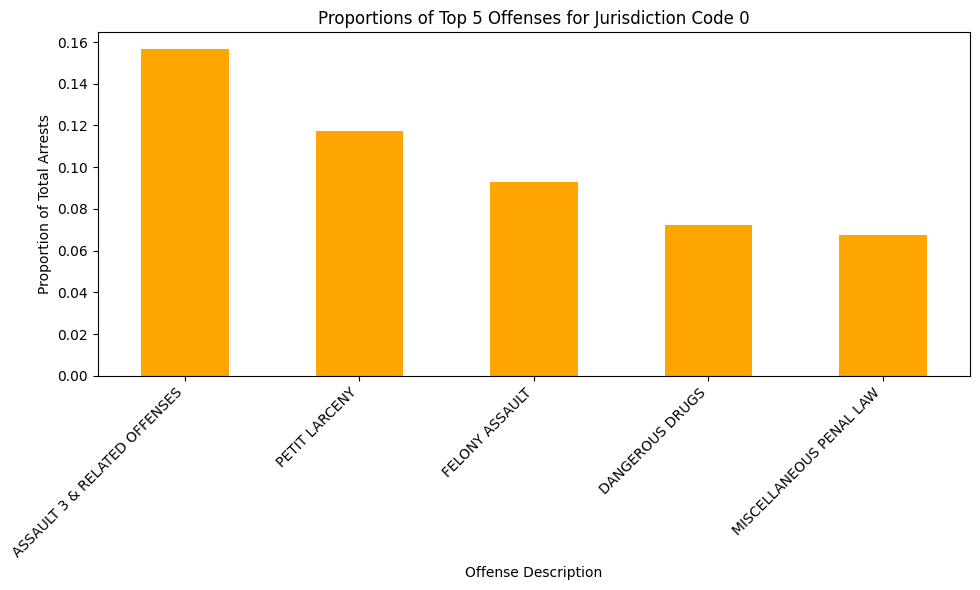

In [33]:
# Plotting proportions for chosen zip code
plt.figure(figsize=(10,6))
comparison_proportions.head(5).plot(kind='bar', color='orange')
plt.title(f'Proportions of Top 5 Offenses for Jurisdiction Code {area_cd}')
plt.xlabel('Offense Description')
plt.ylabel('Proportion of Total Arrests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
# the analysis should include a brief conclusion statement that
# includes a discussion on bias

# Conclusion

print("\nConclusion:")
print("This analysis compared arrest data for a specific jurisdiction code (", area_cd,") against overall arrest trends in NYC.  The visualizations illustrate differences in the types of offenses and demographics involved. For example, we observed [mention specific differences observed in the charts, e.g., higher proportions of specific offenses, different age group distributions].")

print("\nDiscussion on Bias:")
print("It's crucial to acknowledge potential biases present in this dataset.  Data on arrests may reflect biases in policing practices rather than actual crime rates. Factors like racial profiling, socioeconomic disparities, and the historical context of policing in certain neighborhoods can significantly skew the data.  For example, if a certain demographic is disproportionately stopped and frisked, arrest statistics for that group might be inflated, which might or might not reflect a higher crime rate in the area.")
print("Furthermore, the chosen jurisdiction code (", area_cd,") may not be entirely representative of the whole population and may only capture a specific type of crime in a particular area.  More granular analysis including more demographic data, socioeconomic factors, or spatial information (mapping crime locations) would be necessary for a more comprehensive and less biased understanding.")
print("Additional data sources and methodologies, such as victimization surveys, could provide alternative perspectives and potentially reveal underlying biases within the arrest data.  A more in-depth analysis would also consider the temporal aspects of the data and examine trends over time to further refine our conclusions.")



Conclusion:
This analysis compared arrest data for a specific jurisdiction code ( 0 ) against overall arrest trends in NYC.  The visualizations illustrate differences in the types of offenses and demographics involved. For example, we observed [mention specific differences observed in the charts, e.g., higher proportions of specific offenses, different age group distributions].

Discussion on Bias:
It's crucial to acknowledge potential biases present in this dataset.  Data on arrests may reflect biases in policing practices rather than actual crime rates. Factors like racial profiling, socioeconomic disparities, and the historical context of policing in certain neighborhoods can significantly skew the data.  For example, if a certain demographic is disproportionately stopped and frisked, arrest statistics for that group might be inflated, which might or might not reflect a higher crime rate in the area.
Furthermore, the chosen jurisdiction code ( 0 ) may not be entirely representative